In [1]:
import os
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from timeit import default_timer as timer
from IPython.display import clear_output

In [2]:

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []    
    for i in range(len(X) - time_steps):
        clear_output(wait=True)
        print('modeling to keras ',round((i/(len(X) - time_steps))*100,2), ('%'), end='')
        s = round(timer() - start)
        if(s>60):
            s /=60
            print(' ', s, ' seconds')
        v = X.iloc[i: (i+time_steps), 2:4].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

In [4]:
#carregando datasets
print('loading dataset...')
train = pd.read_csv('../datasets/com_concept_drift/sdn_train_unormalized.csv')
test = pd.read_csv('../datasets/com_concept_drift/sdn_test_unormalized.csv')

train = train[train.delay>=0]
test = test[test.delay>=0]

train = train[train.delay<=10000] 
test = test[test.delay<=10000] 


loading dataset...


In [5]:
start = timer()
print('creating window')
TIME_STEPS = 1
X_train,Y_train = create_dataset(train, train.delay, time_steps=TIME_STEPS)
X_test,Y_test = create_dataset(test, test.delay, time_steps=TIME_STEPS)

print('2D to 3D duration: ', round(timer() - start))

modeling to keras  99.81 %  11.133333333333333  seconds


# setting MLP

In [6]:
#configurando rede para treinamento
print('Init Train')
model = keras.Sequential()
model.add(tf.keras.layers.Dense(activation="relu", input_dim=2, units=10, kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(activation="relu", units=128, kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(activation="relu", units=128, kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(activation="relu", units=128, kernel_initializer='uniform'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))

# compiling

In [7]:
loss ="mse"
optim = tf.keras.optimizers.Adam(
    learning_rate=0.0001)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optim, 
             metrics=metrics
             )

# training 

In [8]:
print('Init Train')
start = timer()
history = model.fit(
    X_train, Y_train, 
    epochs=100, 
    batch_size= 10,
    validation_split=0.1,
    shuffle=False,
#     callbacks=[tensorboard_callback]
)
print('trraining duration: ',round(timer() - start))

Init Train
Epoch 1/100
4995/4995 [==============================] - 20s 3ms/step - loss: 14563.4932 - accuracy: 0.6461 - val_loss: 18984.5566 - val_accuracy: 0.0000e+00
Epoch 2/100
4995/4995 [==============================] - 16s 3ms/step - loss: 14593.8555 - accuracy: 0.0000e+00 - val_loss: 19057.5508 - val_accuracy: 0.0000e+00
Epoch 3/100
4995/4995 [==============================] - 14s 3ms/step - loss: 14554.5801 - accuracy: 0.0000e+00 - val_loss: 19092.3496 - val_accuracy: 0.0000e+00
Epoch 4/100
4995/4995 [==============================] - 13s 3ms/step - loss: 14517.0762 - accuracy: 0.0000e+00 - val_loss: 19077.9277 - val_accuracy: 0.0000e+00
Epoch 5/100
4995/4995 [==============================] - 12s 2ms/step - loss: 14431.0537 - accuracy: 0.1121 - val_loss: 19162.8281 - val_accuracy: 0.0000e+00
Epoch 6/100
4995/4995 [==============================] - 11s 2ms/step - loss: 14296.5068 - accuracy: 4.0047e-05 - val_loss: 19064.8398 - val_accuracy: 0.0000e+00
Epoch 7/100
4995/4995 [==

Epoch 47/100
4995/4995 [==============================] - 12s 2ms/step - loss: 1984.7052 - accuracy: 0.5923 - val_loss: 1478.1158 - val_accuracy: 0.1009
Epoch 48/100
4995/4995 [==============================] - 13s 3ms/step - loss: 1962.3511 - accuracy: 0.6076 - val_loss: 1446.5250 - val_accuracy: 0.1481
Epoch 49/100
4995/4995 [==============================] - 13s 3ms/step - loss: 2008.5388 - accuracy: 0.6308 - val_loss: 1425.2990 - val_accuracy: 0.1813
Epoch 50/100
4995/4995 [==============================] - 12s 2ms/step - loss: 1959.2343 - accuracy: 0.6064 - val_loss: 1346.4398 - val_accuracy: 0.7677
Epoch 51/100
4995/4995 [==============================] - 12s 2ms/step - loss: 1965.0155 - accuracy: 0.6230 - val_loss: 1464.7053 - val_accuracy: 0.0667
Epoch 52/100
4995/4995 [==============================] - 12s 2ms/step - loss: 1977.0648 - accuracy: 0.6189 - val_loss: 1478.6978 - val_accuracy: 0.0578
Epoch 53/100
4995/4995 [==============================] - 12s 2ms/step - loss: 197

4995/4995 [==============================] - 13s 3ms/step - loss: 1983.3220 - accuracy: 0.6399 - val_loss: 1538.5986 - val_accuracy: 0.9908
trraining duration:  1496


# saving model

In [9]:
print('Saving Model')
model.save('models/mlp')

Saving Model
INFO:tensorflow:Assets written to: models/mlp\assets


# loss training

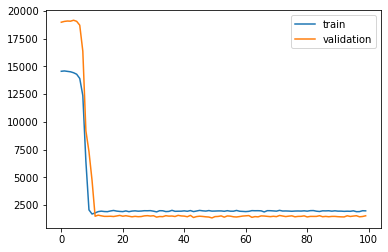

In [10]:
# accuracy


fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend();

# accuracy

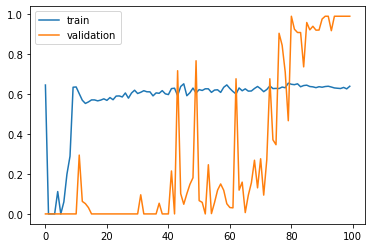

In [11]:

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='validation')
ax1.legend();

# predicting

In [12]:
y_pred = model.predict(X_test)

# unormalizing 

In [13]:
f_columns = ['temperature','label']
scaler1 = StandardScaler().fit(train[f_columns])
scaler2 = StandardScaler().fit(train[f_columns])

scaler1= scaler1.fit(train[f_columns].to_numpy())
scaler2 = scaler2.fit(train[['delay']])


#normalizando test
scaler3 = StandardScaler().fit(test[f_columns])
scaler4 = StandardScaler().fit(test[f_columns])

scaler3 = scaler3.fit(test[f_columns].to_numpy())
scaler4 = scaler4.fit(test[['delay']])


In [14]:
y_test_inv = scaler4.inverse_transform(Y_test.reshape(1,-1))
y_pred_inv = scaler4.inverse_transform(y_pred)

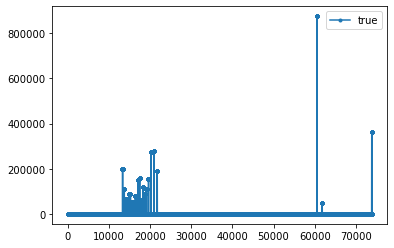

In [15]:
fig2 = plt.figure()
a2 = fig2.add_subplot(1,1,1)
a2.plot(y_test_inv.flatten(), marker='.', label='true')
a2.legend();

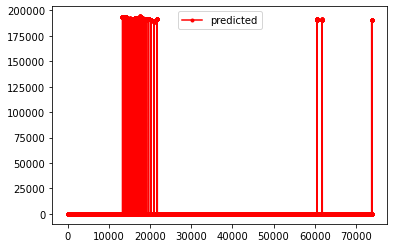

In [16]:
fig3 = plt.figure()
a3 = fig3.add_subplot(1,1,1)
a3.plot(y_pred_inv.flatten(),'r',marker='.', label='predicted')
a3.legend();


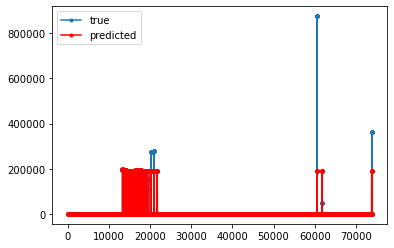

In [17]:

plt.plot(y_test_inv.flatten(), marker='.', label='true')

plt.plot(y_pred_inv.flatten(),'r',marker='.', label='predicted')
plt.legend();

In [26]:
l1 = []
l2 = []
for i in np.arange(y_pred_inv.shape[0]):
    clear_output(wait=True)
    print('progress ',round((i/y_pred_inv.shape[0])*100,2), ('%'))
    if(y_pred_inv[i,0,0]<=350000):
        l1.append(y_pred_inv[i])
    if(y_test_inv[0,i]<=350000):
        l2.append(y_test_inv[0,i])

y_pred_inv2 = np.array(l1)
y_test_inv2 = np.array(l2)

progress  98.6 %


In [27]:

plt.plot(y_test_inv2.flatten(), marker='.', label='true')

plt.plot(y_pred_inv2.flatten(),'r',marker='.', label='predicted')
plt.legend();

In [28]:
l1 = []
l2 = []
for i in np.arange(y_pred_inv.shape[0]):
    clear_output(wait=True)
    print('progress ',round((i/y_pred_inv.shape[0])*100,2), ('%'))
    if(y_pred_inv[i,0,0]<=350000):
        l1.append(y_pred_inv[i])
    if(y_test_inv[0,i]<=350000):
        l2.append(y_test_inv[0,i])

y_pred_inv3 = np.array(l1)
y_test_inv3 = np.array(l2)

progress  100.0 %


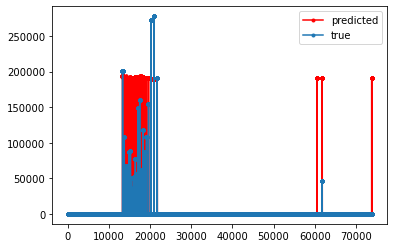

In [35]:



plt.plot(y_pred_inv2.flatten(),'r',marker='.', label='predicted')
plt.plot(y_test_inv2.flatten(), marker='.', label='true')
plt.legend();

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
np.max(y_test_inv)

875000.6517809001

In [38]:
np.max(y_pred_inv[:,0])

194165.39

In [39]:
mean_squared_error(y_test_inv[0], y_pred_inv[:,0])

513641227.8055485

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error


In [50]:
rmse =  mean_squared_error(y_test_inv[0], y_pred_inv[:,0], squared=False)
mae =  mean_absolute_error(y_test_inv[0], y_pred_inv[:,0])
median_mae = median_absolute_error(y_test_inv[0], y_pred_inv[:,0])
msle = mean_squared_log_error(y_test_inv[0], y_pred_inv[:,0])

print(rmse)
print(mae)
print(median_mae)


22663.654334761384
2070.443394213174
20.907545591220824


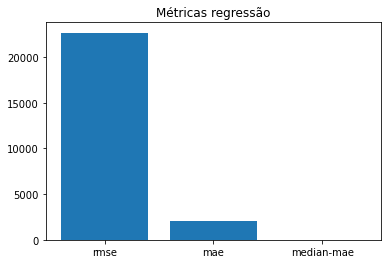

In [51]:
objects = ('rmse', 'mae', 'median-mae')
y_pos = np.arange(3)
performance = [rmse,mae,median_mae]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('Métricas regressão')

plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (4).

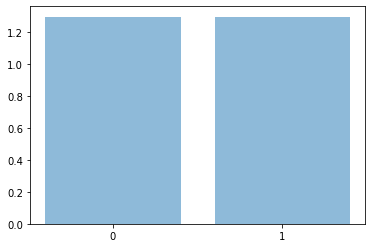

In [47]:
objects = ('msle')
y_pos = np.arange(2)
performance = [msle]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('Métricas regressão')

plt.show()